<a href="https://colab.research.google.com/github/JeromeMberia/FinAccess_household_survey/blob/main/FinAccess_household_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Figuring out how we can predict which individuals are most likely to have or use a bank account.



> 



### b) Defining the Metric for Success



> It will be successfull when  we can predict which individuals are most likely to have or use a bank account.



### c) Understanding the context 



> place it here



### d) Recording the Experimental Design

> Step carried out:
>
> * Load the dataset
>
> * preview 
>
> * Check the dataset
>
> * Tidying the Dataset
>
> * Exploratory Analysis
>  * univariate, 
>  * bivariate 
>  * multivariate
>
> * Challenging the Solution
> * Follow Up Questions





### e) Data Relevance



> place it here



## Reading the Data

In [455]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [456]:
# Loading the Data from the source i.e. csv
# 
df = pd.read_csv('Financial Dataset - 1.csv')

## Checking the Data

In [457]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 13)

In [458]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [459]:
# Previewing the bottom of our dataset
#
df.tail() 

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [460]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [461]:
#Checking how many unique value are in a column
df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [462]:
df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [463]:
df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [464]:
df['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know', nan], dtype=object)

In [465]:
df['The relathip with head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives', nan], dtype=object)

In [466]:
df['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6', nan],
      dtype=object)

In [467]:
df['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

In [468]:
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [469]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## Tidying the Dataset

In [471]:
df = df[df['year']<=2018]

In [472]:
df['year'].unique()

array([2018, 2016, 2017])

In [473]:
df = df.rename(columns={'Has a Bank account':'has_a_bank_account', 
                   'Type of Location':'location_type',
                   'Cell Phone Access':'cellphone_access',  
                   'Respondent Age':'age_of_respondent',
                   'The relathip with head':'relationship_with_head', 
                   'Level of Educuation':'education_level', 
                   'Type of Job':'job_type'})
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [474]:
df.duplicated().sum()

0

In [475]:
df['education_level'] = df['education_level'].replace(['6'], np.nan) 

In [476]:
df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', nan], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


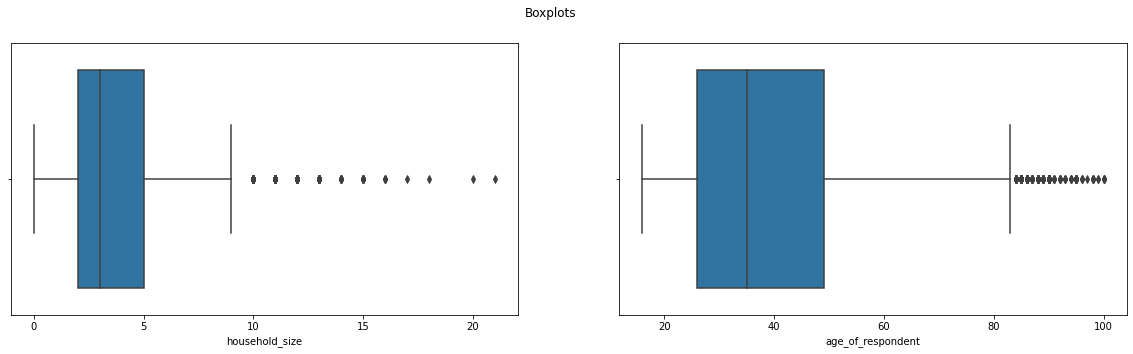

In [477]:
# Checking for Outliers
#
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('Boxplots')
sns.boxplot(df['household_size'], ax=ax1)
sns.boxplot(df['age_of_respondent'], ax=ax2)
plt.show()

In [478]:
# removing outliers
max_thresold_h_s = df['household_size'].quantile(0.95)
max_thresold_a_o_r = df['age_of_respondent'].quantile(0.95)

min_thresold_h_s = df['household_size'].quantile(0.05)
min_thresold_a_o_r = df['age_of_respondent'].quantile(0.05)

df = df[(df['household_size']<max_thresold_h_s) & (df['household_size']>min_thresold_h_s)]
df = df[(df['age_of_respondent']<max_thresold_a_o_r) & (df['age_of_respondent']>min_thresold_a_o_r)]

In [479]:
# Checking for Anomalies
#
household_size_Q1 = df['household_size'].quantile(.25)
household_size_Q3 = df['household_size'].quantile(.75)

iqr_h_s = household_size_Q3 - household_size_Q1


age_of_respondent_Q1 = df['age_of_respondent'].quantile(.25)
age_of_respondent_Q3 = df['age_of_respondent'].quantile(.75)

iqr_a_o_r = age_of_respondent_Q3 - age_of_respondent_Q1

print(f'The interquartile range of household_size is {iqr_h_s}.')
print(f'The interquartile range of age_of_respondent is {iqr_a_o_r}.')

The interquartile range of household_size is 3.0.
The interquartile range of age_of_respondent is 19.0.


In [480]:
# Identifying the Missing Data
#
df.isnull().sum()

country                    7
year                       0
uniqueid                   0
has_a_bank_account        23
location_type              9
cellphone_access           7
household_size             0
age_of_respondent          0
gender_of_respondent      14
relationship_with_head     0
marital_status            19
education_level           38
job_type                  22
dtype: int64

In [481]:
df.dropna()

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


## Exploratory Analysis

### Univariate Analysis

In [482]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

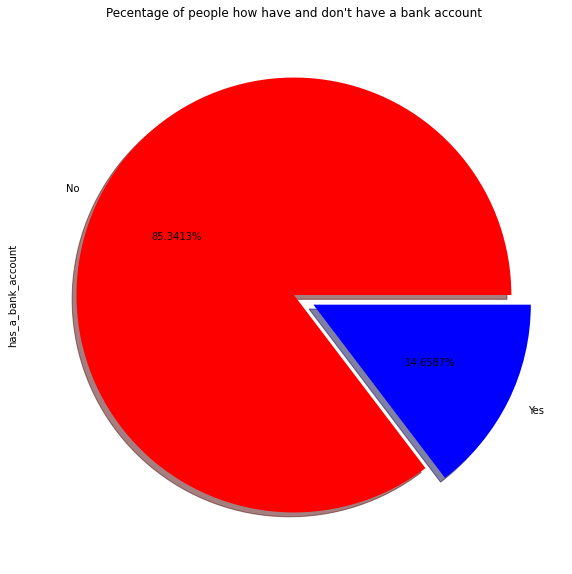

In [483]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
colors = ['red', 'blue']
df['has_a_bank_account'].value_counts().plot.pie(explode=[0,0.1],
                                                 colors=colors, 
                                                 autopct='%1.4f%%',
                                                 ax=ax,
                                                 shadow=True)
ax.set_title('Pecentage of people how have and don\'t have a bank account', )
plt.show()

#### Central Tendency

##### mean

In [484]:
# the mean of people in house in each country
df_c = df.groupby('country')
df_c['household_size'].mean()

country
Kenya       4.130923
Rwanda      4.388398
Tanzania    2.401109
Uganda      4.300644
Name: household_size, dtype: float64

##### median

In [485]:
# the median of Number of people living in one house 
df['household_size'].median()

4.0

In [486]:
# the median of Number of people living in one house
df['age_of_respondent'].median()

35.0

##### mode

In [487]:
df['age_of_respondent'].mode()

0    30.0
dtype: float64

In [488]:
df['household_size'].mode()

0    2.0
dtype: float64

####Dispersion

##### Standard Deviation

In [489]:
df['household_size'].std()

1.6041369725066776

##### Variance

In [490]:
df['household_size'].var()

2.5732554265628895

##### Range

In [491]:
max = df['household_size'].max()
min = df['household_size'].min()
range = max-min
range

5.0

##### Quantiles

In [492]:
df['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    4.0
0.75    5.0
Name: household_size, dtype: float64

##### Summary statistics

In [493]:
df['household_size'].describe()

count    15993.000000
mean         3.844745
std          1.604137
min          2.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: household_size, dtype: float64

#### Descriptions of the distribution curve

##### Skewness

In [494]:
df['household_size'].skew()

0.4383016426273113

##### Kurtosis

In [495]:
df['household_size'].kurt()

-0.9710220163335066

### Bivariate Analysis

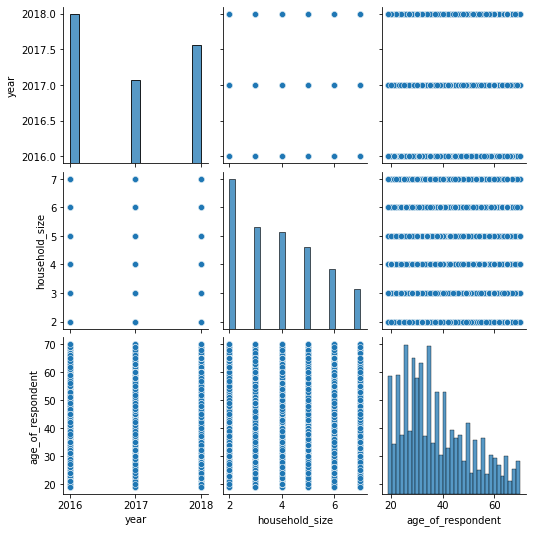

In [496]:
sns.pairplot(df)
plt.show()

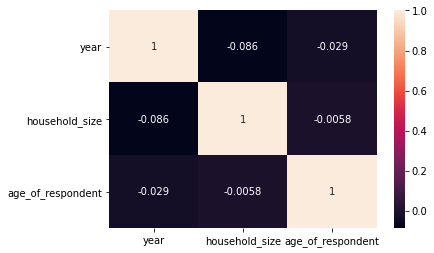

In [497]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [499]:
df['age_of_respondent'].corr(df['household_size']) 

-0.0057785316314004085

## Follow up questions

### a). Did we have the right data?

> Yes, the set data was extracted from various Finscope surveys ranging from 2016 to 2018 beside it having some extra years.

### b). Do we need other data to answer our question?

> just for latest year to get a better prediction.